# US Crude export
Regulatory changes in 2015 opened up the Salish Sea to U.S. crude export.  This notebook explores how this affected crude transport in the Salish Sea.  My goal is to understand Bitumen export and trends in crude export.  I expected an increase in crude export since 2015.  I'm not seeing that.  I've followed up with ECY to ask questions about why:
- 2018 is the only year with recorded Bitumen transfers (see 2021 record below)
- Only Bakken exports in 2019/2020 (again, see 2021 record)
- Lots of variability in volume (shown) and number of transfers (not shown) between years.


In [1]:
# import necessary packages
import os
import yaml
import pandas
import numpy
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
import geopandas as gpd
from pathlib import Path
# import function for querying DOE dataframes
from dask import delayed

import sys
extra_path = "/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/"
if extra_path not in sys.path:
    sys.path.append(extra_path)
    
#from monte_carlo_utils import get_ECY_df, get_bin

In [2]:
# set file location and name
#/data/MIDOSS/spreadsheets/MuellerTrans4-30-20.xlsx
ecy_xls_path = Path(
    '/Users/rmueller/Data/MIDOSS/DeptOfEcology/CrudeANT_Mueller_10-13-2023.xlsx'
)
#/data/MIDOSS/marine_transport_data/Oil_Transfer_Facilities.xlsx
fac_xls_path = Path(
    '/Users/rmueller/Data/MIDOSS/marine_transport_data/Oil_Transfer_Facilities.xlsx'
)

In [3]:
# import facility locations
facWA = pandas.read_excel(
    fac_xls_path,
    sheet_name = 'Washington',
    usecols="B,D,J,K"
)

mpl.rc('font', size=11)
# some of the following may be repetetive but can also be set relative to the font value above 
#    (eg "xx-small, x-small,small, medium, large, x-large, xx-large, larger, or smaller"; see link above for details)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=16)
mpl.rc('text', usetex=False)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

In [4]:
# Import columns are: (A) AndID, (B) Company, (C) StartDateTime, (E) Deliverer, 
# (F) Receiver, (M) Region, 
# (N) Product, (O) Quantity in Gallons, (P) Transfer Type 
# (oiling, Cargo, or Other)', 
# define floating point precision for transfer quanitities
precision = 5

# read in data
df = pandas.read_excel(
    ecy_xls_path,
    usecols="A,B,C,E,F,M,N,O,P"
)

In [5]:
# # Housekeeping: Force one name per marine transfer site
# df = df.replace(
#     to_replace = "US Oil Tacoma ",
#     value = "U.S. Oil & Refining"
# )
# df = df.replace(
#     to_replace = "TLP",
#     value = "TLP Management Services LLC (TMS)"
# )
# # Housekeeping: Convert DOE terminal names to the names
# #  used in our monte-carlo, if different. 
# df = df.replace(
#     to_replace = "Maxum (Rainer Petroleum)",
#     value = "Maxum Petroleum - Harbor Island Terminal"
# )
# df = df.replace(
#     to_replace = "Andeavor Anacortes Refinery (formerly Tesoro)",
#     value = "Marathon Anacortes Refinery (formerly Tesoro)"
# )

In [6]:
df.head(2)

,AntID,Company,StartDateTime,Deliverer,Receiver,Region,Product,TransferQtyInGallon,TransferType
0,129431,SHELL,2015-01-16 10:00:00,Puget Sound Refinery,ATB TUG VISION,Skagit,CRUDE OIL,840000,Other (incl Lube/Hyd Oil)
1,130647,SHELL,2015-02-20 03:00:00,Puget Sound Refinery,ATB BARGE 650-10,Skagit,CRUDE OIL,6930000,Cargo


In [7]:
df[["AntID","Product"]].groupby("Product").count().rename(columns={"AntID":"Transfers"})

,Transfers
Product,
BAKKEN,11
BITUMEN OIL (DIL OR SYN),6
CRUDE OIL,143


In [8]:
df.loc[(df.Product=="BITUMEN OIL (DIL OR SYN)")]

,AntID,Company,StartDateTime,Deliverer,Receiver,Region,Product,TransferQtyInGallon,TransferType
66,177314,Targa Sound Terminal,2018-04-25 14:00:00,SeaPort Sound Terminal,VIJAY SEA,Pierce,BITUMEN OIL (DIL OR SYN),699568,Cargo
70,177718,Targa Sound Terminal,2018-05-06 22:00:00,SeaPort Sound Terminal,VIJAY SEA,Pierce,BITUMEN OIL (DIL OR SYN),220234,Cargo
78,178701,Targa Sound Terminal,2018-05-29 21:00:00,SeaPort Sound Terminal,VIJAY SEA,Pierce,BITUMEN OIL (DIL OR SYN),621838,Cargo
79,178918,"OLYMPIC TUG & BARGE, INC.",2018-06-03 10:00:00,Alon Asphalt Company,DUGAN PEARSALL,King,BITUMEN OIL (DIL OR SYN),147000,Cargo
83,180808,Targa Sound Terminal,2018-07-15 06:00:00,SeaPort Sound Terminal,OLYMPIC SPIRIT,Pierce,BITUMEN OIL (DIL OR SYN),84000,Cargo
88,184555,Targa Sound Terminal,2018-10-11 13:00:00,SeaPort Sound Terminal,WEBB MOFFETT,Pierce,BITUMEN OIL (DIL OR SYN),725478,Cargo


In [9]:
df.loc[(df.Product=="BAKKEN")]

,AntID,Company,StartDateTime,Deliverer,Receiver,Region,Product,TransferQtyInGallon,TransferType
105,198570,TESORO REFINING & MARKETING CO AND TESOR,2019-10-29 02:00:00,Andeavor Anacortes Refinery,OVERSEAS BOSTON,Skagit,BAKKEN,2436000,Cargo
108,200612,U.S. Oil & Refining,2020-01-06 15:30:00,U.S. Oil & Refining,HOUSTON,Pierce,BAKKEN,6006000,Cargo
109,201304,TESORO REFINING & MARKETING CO AND TESOR,2020-01-29 12:00:00,Andeavor Anacortes Refinery,FLORIDA,Skagit,BAKKEN,6300000,Cargo
110,201526,U.S. Oil & Refining,2020-02-04 12:00:00,U.S. Oil & Refining,COMMENCEMENT BAY,Pierce,BAKKEN,3108000,Cargo
111,201660,U.S. Oil & Refining,2020-02-06 15:00:00,U.S. Oil & Refining,HOUSTON,Pierce,BAKKEN,6216000,Cargo
112,201691,U.S. Oil & Refining,2020-02-09 07:00:00,U.S. Oil & Refining,COMMENCEMENT BAY,Pierce,BAKKEN,3108000,Cargo
113,201825,TESORO REFINING & MARKETING CO AND TESOR,2020-02-14 11:00:00,Andeavor Anacortes Refinery,AMERICAN ENDURANCE,Skagit,BAKKEN,6300000,Cargo
114,202816,TESORO REFINING & MARKETING CO AND TESOR,2020-03-15 00:00:00,Andeavor Anacortes Refinery,FLORIDA,Skagit,BAKKEN,6300000,Cargo
118,203406,TESORO REFINING & MARKETING CO AND TESOR,2020-04-02 20:15:00,Andeavor Anacortes Refinery,ARISTOKLIS,Skagit,BAKKEN,9240000,Cargo
120,203685,U.S. Oil & Refining,2020-04-14 10:00:00,U.S. Oil & Refining,HOUSTON,Pierce,BAKKEN,4620000,Cargo


### Strange that all dilbit transfers are in 2018

In [10]:
# obtain datetime series:
datetimes = pandas.to_datetime(df.StartDateTime)

# assign new date columns
df['day'] = datetimes.dt.day
df['month'] = datetimes.dt.month
df['year'] = datetimes.dt.year
# time.astype('datetime64[Y]').view(

<AxesSubplot:xlabel='year'>

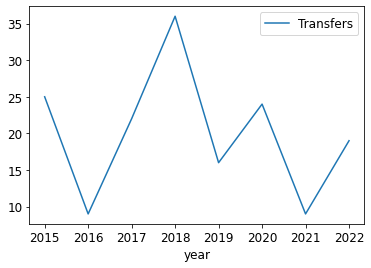

In [11]:
df[["AntID","year"]].groupby("year").count().rename(columns={"AntID":"Transfers"}).plot()

<AxesSubplot:xlabel='year'>

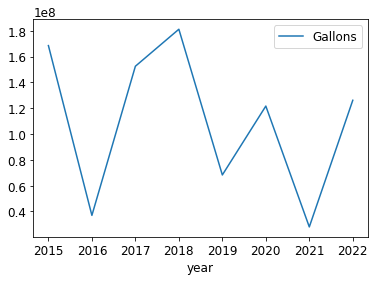

In [13]:
df[["TransferQtyInGallon","year"]].groupby("year").sum().rename(columns={"TransferQtyInGallon":"Gallons"}).plot()

In [14]:
df.year.min()

2015

## Show all data entries that can be explored in this dataset

In [17]:
df = pandas.read_excel(
    ecy_xls_path
)
[*df]

['AntID',
 'Company',
 'StartDateTime',
 'Duration',
 'Deliverer',
 'Receiver',
 'IsRegulatedReceiverFlag',
 'Location',
 'StreetAddress',
 'LatNumber',
 'LongNumber',
 'City',
 'Region',
 'Product',
 'TransferQtyInGallon',
 'TransferType',
 'IsPreboomed',
 'IsTransferRateGT500',
 'ContactName',
 'ContactPhone',
 'DelivererTypeDescription',
 'ReceiverTypeDescription',
 'RemarksDescription']

# Explore previously provided 2021 data

In [19]:
df_21=pandas.read_excel(
    '/Users/rmueller/Data/MIDOSS/DeptOfEcology/MuellerTrans_5-26-21.xlsx'
)
[*df_21]

['AntID',
 'Company',
 'EntryDateTime',
 'HrsBetweenEnryAndTransfer',
 'StartDateTime',
 'Duration',
 'Deliverer',
 'Receiver',
 'IsRegulatedReceiverFlag',
 'Location',
 'StreetAddress',
 'LatNumber',
 'LongNumber',
 'City',
 'Region',
 'Product',
 'TransferQtyInGallon',
 'TransferType',
 'IsPreboomed',
 'IsTransferRateGT500',
 'ContactName',
 'ContactPhone',
 'DelivererTypeDescription',
 'ReceiverTypeDescription',
 'RemarksDescription',
 'TotalVolume']

In [33]:
df_21.groupby('Product').count()

,AntID,Company,EntryDateTime,HrsBetweenEnryAndTransfer,StartDateTime,Duration,Deliverer,Receiver,IsRegulatedReceiverFlag,Location,...,TransferQtyInGallon,TransferType,IsPreboomed,IsTransferRateGT500,ContactName,ContactPhone,DelivererTypeDescription,ReceiverTypeDescription,RemarksDescription,TotalVolume
Product,,,,,,,,,,,,,,,,,,,,,
AVIATION GASOLINE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BAKKEN,4,4,4,4,4,4,4,4,4,4,...,4,4,3,4,4,4,4,4,0,4
BIODIESEL,419,419,419,419,419,419,419,419,337,419,...,419,419,52,49,419,419,419,419,10,419
BITUMEN OIL (DIL OR SYN),1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,0,1
Bunker Oil/HFO (0.5 - 3.5% Sulfur),206,206,206,206,206,206,206,206,206,200,...,206,206,176,175,206,206,206,206,29,206
Bunker Oil/HFO (IMO < 0.5% Sulfur),386,386,386,386,386,386,386,386,386,380,...,386,386,341,373,386,386,386,386,110,386
CRUDE OIL,58,58,58,58,58,58,58,58,58,58,...,58,58,45,58,58,58,58,58,40,58
CUTTER STOCK,39,39,39,39,39,39,39,39,39,39,...,39,39,32,38,39,39,39,39,18,39
Cat Feed/VGO,58,58,58,58,58,58,58,58,58,58,...,58,58,40,58,58,58,58,58,26,58


## Both Bakken and Dilbit appear here....

In [21]:
df_21.shape

(4651, 26)

# Plot up transfer quantities for receivers that aren't regulated

<AxesSubplot:>

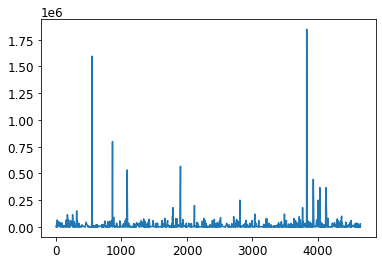

In [30]:
df_21.loc[df_21.IsRegulatedReceiverFlag!="Y"].TransferQtyInGallon.plot()

# Show receivers 

In [31]:
df_21.loc[df_21.IsRegulatedReceiverFlag!="Y"].loc[df_21.TransferQtyInGallon>1000000]

,AntID,Company,EntryDateTime,HrsBetweenEnryAndTransfer,StartDateTime,Duration,Deliverer,Receiver,IsRegulatedReceiverFlag,Location,...,TransferQtyInGallon,TransferType,IsPreboomed,IsTransferRateGT500,ContactName,ContactPhone,DelivererTypeDescription,ReceiverTypeDescription,RemarksDescription,TotalVolume
552,211665,TESORO REFINING & MARKETING CO AND TESOR,2021-01-19 12:14:00,-6,2021-01-19 06:00:00,12.0,Tesoro Vancouver Terminal,Tidewater Barge Berth #5,NaN,"VANCOUVER 2, BERTH 5",...,1596000,Cargo,Y,Y,Nicole Mercier,360-407-6872,Facility,Un-regulated Vessel,Changed from fueling to cargo. GF ECY 1/19/21,3126529027
3828,214686,MANCHESTER FUEL DEPARTMENT,2021-05-04 08:26:00,96,2021-05-08 08:00:00,8.0,NAVSUP Manchester,USNS GUADALUPE,NaN,MANCHESTER FUEL DOCK,...,1848000,Cargo,Y,Y,Benjamin Ocampo,(360) 476-2127,Facility,Un-regulated Vessel,NaN,3126529027
3829,214687,MANCHESTER FUEL DEPARTMENT,2021-05-04 08:27:00,120,2021-05-09 08:00:00,8.0,NAVSUP Manchester,USNS GUADALUPE,NaN,MANCHESTER FUEL DOCK,...,1848000,Cargo,Y,Y,Benjamin Ocampo,(360) 476-2127,Facility,Un-regulated Vessel,NaN,3126529027


### Take away: High volume "not regulated" => military, not (e.g.) cargo. 